In [6]:
import pandas as pd
import re

clubs = pd.read_csv('clubs.csv')
clubs.head()

,id,title,link,image,description
0,1,서울권 운동(스포츠) 연합 커뮤니티 STREET BOND,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/d5e4e89/resize'],"📌 STREET BOND 소개\r\n운동은 하고 싶은데, 몇 달 회비 끊고 하자니,..."
1,2,안녕하세요 한일문화연구회에서 함께할 동아리원을 모집합니다,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/d3e4ae1/resize'],일본문화에 관심이 있으신가요? 심심한데 마땅한 동아리가 없으신가요? 중앙동아리 한일...
2,3,2020학년도 2학기 KUISA 14기 벗 모집이 하루 남았습니다!!!!!!,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/2b9355e/resize'],"👉2020년도 2학기 KUISA 14기 벗 모집 안내👈\n\r\nKUISA란, Ko..."
3,4,1분 명상법~! ,https://www.koreapas.com/bbs/view.php?id=circl...,"['https://img.koreapas.com/i/484c9e2/resize', ...",안녕하세요! 원불교 학생회입니다. ㅎㅎ\r\n이번에는 명상을 어떻게 하는 지에 대한...
4,5,연합발표토론동아리 POP 22기 모집합니다 !,https://www.koreapas.com/bbs/view.php?id=circl...,"['https://img.koreapas.com/i/607084d/resize', ...",[22기 P.O.P 단원 모집!]\n\r\n📢 스펙업 대표동아리 Top30\r\n📢...


In [8]:
clubs['txt'] = clubs['title']+clubs['description']

In [9]:
def cleantxt(txt):
    txt = txt[:-35]
    txt = txt.replace('\n',' ')
    txt = txt.replace('\r','')
    txt = txt.replace('(',' ')
    txt = txt.replace(')',' ')
    p = re.compile(r'[A-Za-z가-힣?.!\'\ ]+')
    txt = ''.join(re.findall(p,txt))
    txt = re.sub(' +', ' ', txt).strip()
    return txt

In [10]:
clubs['txt'] = clubs['txt'].apply(cleantxt)

In [12]:
import ssl
from urllib.request import urlopen
from bs4 import BeautifulSoup

context = ssl._create_unverified_context()
resp = urlopen('https://www.ranks.nl/stopwords/korean',context=context)
dom = BeautifulSoup(resp.read().decode('utf8'),'html.parser')
tds = dom.select('.panel-body > table > tbody > tr > td')

In [13]:
stopwords=[]

for _ in tds:
    stopwords+=re.findall(r'([ \w]+)<br/>',str(_))
    
stopwords.append('만큼')
stopwords.append('만 못하다')
stopwords.append('영')
stopwords.append('의')
stopwords.append('하다')

In [14]:
from konlpy.tag import Komoran

komo = Komoran() #어미/어근의 분류가 잘 되어있다 판단.

class Tokenize:
    def __init__(self):
        pass
    def __call__(self, text):
        #stemming
        #어미 관련 모두 제외
        stemmed = [_ for _ in komo.pos(text) if _[1] not in ['EC', 'EF', 'EP', 'ETM', 'ETN']]
        
        #lemmatizing
        #VV=동사어근, VA=형용사어근
        lemma = [_[0]+'다' if (_[1]=='VA') or (_[1]=='VV') else _[0] for _ in stemmed]
        
        #remove stopwords
        tokens = [_ for _ in lemma if _ not in stopwords]
        
        return tokens

In [15]:
tag = pd.read_csv('tags.txt',sep='delimiter', encoding='utf-8', header=None)
tag.columns = ['tag']
tag.head()

C:\Users\ky_moon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,tag
0,"수레바퀴', '학회', '경영'"
1,"Young Tigers', '운동', '동아리'"
2,"KULSOM', '학회', '경영'"
3,"유도부', '동아리', '운동'"
4,"KU-HOPE', '봉사', '동아리'"


In [16]:
df = clubs.iloc[400:,].reset_index()
df.head()

,index,id,title,link,image,description,txt
0,400,401,🌈중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다,https://www.koreapas.com/bbs/view.php?id=circl...,[],🌈중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다!\n\r\n⛱수레바퀴...,중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다중앙동아리 정치경제학연구...
1,401,402,[2020 YOUNG TIGERS 신입단원 모집 D-day],https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/de478d7/resize'],[2020 YOUNG TIGERS 신입단원 모집]\n\r\n안녕하십니까 고려대학교 ...,YOUNG TIGERS 신입단원 모집 Dday YOUNG TIGERS 신입단원 모집...
2,402,403,🔥[KULSOM D-1] 마감 하루 전!!📢⚠️🔥,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/6f7ae51/resize'],🔥지원 마감 하루 전입니다! \n\r\n🔥한 학기 같이 즐거운 추억 만들어요! \n...,KULSOM D 마감 하루 전!! 지원 마감 하루 전입니다! 한 학기 같이 즐거운 ...
3,403,404,[柔道部] 유도부 상시모집 🥋,https://www.koreapas.com/bbs/view.php?id=circl...,"['https://img.koreapas.com/i/5b0b384/resize', ...",🥋고대 유도부 신입부원 상시모집🥋\r\n💪🏻아무나 와라 강하게 키워줄게💪🏻\n\r\...,유도부 상시모집 고대 유도부 신입부원 상시모집 아무나 와라 강하게 키워줄게 고려대학...
4,404,405,[D-3]🏠KU-HOPE 2020년 1학기 리크루팅!🏠,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/e01d297/resize'],🚑재난에서 희망으로! 안녕하세요 고려대학교 집수리봉사동아리 KU-HOPE 입니다.\...,DKUHOPE 년 학기 리크루팅! 재난에서 희망으로! 안녕하세요 고려대학교 집수리봉...


In [17]:
train_data = df.iloc[:160,]
train_data.head()

,index,id,title,link,image,description,txt
0,400,401,🌈중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다,https://www.koreapas.com/bbs/view.php?id=circl...,[],🌈중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다!\n\r\n⛱수레바퀴...,중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다중앙동아리 정치경제학연구...
1,401,402,[2020 YOUNG TIGERS 신입단원 모집 D-day],https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/de478d7/resize'],[2020 YOUNG TIGERS 신입단원 모집]\n\r\n안녕하십니까 고려대학교 ...,YOUNG TIGERS 신입단원 모집 Dday YOUNG TIGERS 신입단원 모집...
2,402,403,🔥[KULSOM D-1] 마감 하루 전!!📢⚠️🔥,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/6f7ae51/resize'],🔥지원 마감 하루 전입니다! \n\r\n🔥한 학기 같이 즐거운 추억 만들어요! \n...,KULSOM D 마감 하루 전!! 지원 마감 하루 전입니다! 한 학기 같이 즐거운 ...
3,403,404,[柔道部] 유도부 상시모집 🥋,https://www.koreapas.com/bbs/view.php?id=circl...,"['https://img.koreapas.com/i/5b0b384/resize', ...",🥋고대 유도부 신입부원 상시모집🥋\r\n💪🏻아무나 와라 강하게 키워줄게💪🏻\n\r\...,유도부 상시모집 고대 유도부 신입부원 상시모집 아무나 와라 강하게 키워줄게 고려대학...
4,404,405,[D-3]🏠KU-HOPE 2020년 1학기 리크루팅!🏠,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/e01d297/resize'],🚑재난에서 희망으로! 안녕하세요 고려대학교 집수리봉사동아리 KU-HOPE 입니다.\...,DKUHOPE 년 학기 리크루팅! 재난에서 희망으로! 안녕하세요 고려대학교 집수리봉...


In [18]:
test_data = df.iloc[160:,]
test_data.head()

,index,id,title,link,image,description,txt
160,560,561,🍀고려대학교 합창단🍀 신입단원 모집,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/3ecafad/resize'],"♤합창의 덫, 화음의 올가미♤\r\n고려대학교 합창단에서 신입단원을 모집합니다!\r...",고려대학교 합창단 신입단원 모집 합창의 덫 화음의 올가미 고려대학교 합창단에서 신입...
161,561,562,[치킨이벤트][오늘마감]🦋 고려대학교 패션동아리 clo.Z 20S/S 모집 🦋,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/56d1998/resize'],[긴급공지] 코로나로 인해 면접이 오프라인 개강 주로 연기되었습니다. 정확한 면접 ...,치킨이벤트오늘마감 고려대학교 패션동아리 clo.Z SS 모집 긴급공지 코로나로 인해...
162,562,563,🏒 (오늘 마감!) 고려대 아이스하키부 프런트 KUIH 1기를 모집합니다! 🏒,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/0e79610/resize'],안녕하세요!\r\n인강과 이상한 개강에 마음이 지친 여러분들을 위한 소식!\r\n아...,오늘 마감! 고려대 아이스하키부 프런트 KUIH 기를 모집합니다! 안녕하세요! 인강...
163,563,564,같이 신나게 빵댕이 흔들어볼 사람~~?🦍🎶,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/80c2186/resize'],🌹불아스 제38기 신입부원을 모집합니다!!\r\n -춤을 좋아하는 사람!\r\n ...,같이 신나게 빵댕이 흔들어볼 사람? 불아스 제기 신입부원을 모집합니다!! 춤을 좋아...
164,564,565,[KULAX] 고려대학교 여자 라크로스 동아리 KULAX 2020-1학기 신입부원 모집,https://www.koreapas.com/bbs/view.php?id=circl...,"['https://img.koreapas.com/i/a827c82/resize', ...",[KULAX] 고려대학교 여자 라크로스 동아리 KULAX 2020-1학기 신입부원 ...,KULAX 고려대학교 여자 라크로스 동아리 KULAX 학기 신입부원 모집 KULAX...


In [19]:
from konlpy.tag import Okt

okt = Okt()
okt.morphs(df['txt'][0])

['중앙',
 '동아리',
 '정치',
 '경제학',
 '연구',
 '회',
 '수레바퀴',
 '가',
 '신입',
 '연인',
 '을',
 '모집',
 '합니다',
 '중앙',
 '동아리',
 '정치',
 '경제학',
 '연구',
 '회',
 '수레바퀴',
 '가',
 '신입',
 '연인',
 '을',
 '모집',
 '합니다',
 '!',
 '수레바퀴',
 '월',
 '오픈',
 '세미나',
 '학회',
 '에',
 '가입',
 '하지',
 '않아도',
 '참여',
 '가능합니다',
 '.',
 '개',
 '중',
 '원하는',
 '만큼',
 '참여',
 '해주세요',
 '!',
 '월',
 '일',
 '저녁',
 '시',
 '영화제',
 '낮',
 '에',
 '투표',
 '하고',
 '밤',
 '에',
 '영',
 '화보',
 '자',
 '!',
 '택배',
 '노동자',
 '의',
 '삶',
 '을',
 '다루는',
 '영화',
 '미안해요',
 '리키',
 '를',
 '함께',
 '보고',
 '이야기',
 '를',
 '나눕니다',
 '.',
 '월',
 '일',
 '저녁',
 '시',
 '오픈',
 '세미나',
 '기술',
 '이',
 '발전',
 '하면서',
 '나타난',
 '플랫폼',
 '노동',
 '!',
 '과연',
 '경제',
 '를',
 '되살릴',
 '수',
 '있을까',
 '?',
 '노동자',
 '의',
 '권리',
 '는',
 '어떻게',
 '보장',
 '받을',
 '수',
 '있는',
 '걸까',
 '?',
 '월',
 '일',
 '저녁',
 '시',
 '수레바퀴',
 '개강',
 '총회',
 '개강',
 '파티',
 '수레바퀴',
 '사람',
 '들',
 '이',
 '한데',
 '모여',
 '학기',
 '활동',
 '방향',
 '을',
 '공유',
 '하고',
 '친목',
 '을',
 '다집니다',
 '!',
 '날씨',
 '도',
 '좋고',
 '꽃',
 '도',
 '피었는데',
 '놀',
 '사람',
 '이',
 '없다구요',


In [21]:
X_train = []

for sentence in train_data['txt']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [22]:
print(X_train[0])

['중앙', '동아리', '정치', '경제학', '연구', '회', '수레바퀴', '신입', '연인', '모집', '중앙', '동아리', '정치', '경제학', '연구', '회', '수레바퀴', '신입', '연인', '모집', '!', '수레바퀴', '오픈', '세미나', '학회', '가입', '않다', '참여', '가능하다', '.', '개', '중', '원하다', '참여', '해주다', '!', '저녁', '시', '영화제', '낮', '투표', '하고', '밤', '화보', '!', '택배', '노동자', '삶', '다루다', '영화', '미안하다', '리키', '보고', '이야기', '나누다', '.', '저녁', '시', '오픈', '세미나', '기술', '발전', '나타나다', '플랫폼', '노동', '!', '경제', '되살리다', '수', '?', '노동자', '권리', '는', '어떻다', '보장', '받다', '수', '걸다', '?', '저녁', '시', '수레바퀴', '개강', '총회', '개강', '파티', '수레바퀴', '사람', '모이다', '학기', '활동', '방향', '공유', '하고', '친목', '다지다', '!', '날씨', '도', '좋다', '꽃', '도', '피다', '놀', '사람', '없다', '?', '수레', '에선', '월달', '학회', '신입', '연인', '분들', '친목', '다지다', '나들이', '벛꽃', '보기', '중', '짜다', '친목', '도모', '기획', '하고', '.', '앞', '수레', 'sns', '주목', '해주다', '!', '수레바퀴', '활동', '은', '?', '정기', '모임', '사회', '떠들썩하다', '이슈', '살피', '고', '관점', '쌓다', '나가다', '.', '주요', '간지', '살펴보다', '노동', '여성', '평화', '정치', '다양하다', '의제', '깊이', '공부', '세미나', '진행', '.', '실천', '활동', '실천', 

In [23]:
X_test = []

for sentence in test_data['txt']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [27]:
print(tokenizer.word_index)

{'.': 1, '!': 2, '은': 3, '토론': 4, '되다': 5, '활동': 6, '동아리': 7, '지원': 8, '수': 9, '?': 10, '이다': 11, '모집': 12, '고려대학교': 13, '학기': 14, '는': 15, '하고': 16, '진행': 17, '적': 18, '학회': 19, '분': 20, '다양하다': 21, '회원': 22, '시': 23, '않다': 24, '대회': 25, '세션': 26, '면접': 27, '곱다': 28, '도란': 29, '기': 30, 'a': 31, '원': 32, 'q': 33, '인': 34, '도': 35, '신입': 36, '학번': 37, '서': 38, '정기': 39, '싶다': 40, '회': 41, '한': 42, '매주': 43, "'": 44, '많다': 45, '가능하다': 46, '통해': 47, '일정': 48, '참여': 49, '대학': 50, '없다': 51, '에는': 52, '받다': 53, '분들': 54, 'kulsom': 55, '사람': 56, '지': 57, '해주다': 58, '아니다': 59, '중': 60, '봉사': 61, '팀': 62, '예정': 63, '대한': 64, '만': 65, '님': 66, '기간': 67, '고': 68, '문의': 69, '영상': 70, '후': 71, '세미나': 72, '부원': 73, '페이스북': 74, '들다': 75, '관심': 76, '주': 77, '인스타그램': 78, '위': 79, '되어다': 80, '열정': 81, '간': 82, '방법': 83, '신': 84, '분야': 85, '어떻다': 86, 'httpswww': 87, '!!': 88, '분위기': 89, '코기토': 90, '법': 91, '학생': 92, '고려대': 93, '공연': 94, '전': 95, '사이버': 96, '나이': 97, '연합': 98, '모임': 99, '교류': 100, '현재': 1

In [28]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

for key, value in tokenizer.word_counts.items():  # 단어와 빈도수의 쌍(pair)을 key와 value로
    total_freq = total_freq + value

    if(value < threshold):  # 단어의 등장 빈도수가 threshold보다 작으면
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4098
등장 빈도가 2번 이하인 희귀 단어의 수: 1655
단어 집합에서 희귀 단어의 비율: 40.38555392874573
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.71991625862934


In [29]:
vocab_size = total_cnt - rare_cnt + 2

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2445


In [30]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
print(X_train[:1])  # 정수로 인코딩

[[114, 8, 383, 662, 253, 42, 341, 37, 1362, 13, 114, 8, 383, 662, 253, 42, 341, 37, 1362, 13, 3, 341, 324, 73, 20, 107, 25, 50, 47, 2, 121, 61, 283, 50, 59, 3, 260, 24, 2143, 703, 1797, 17, 916, 2144, 3, 2145, 1363, 749, 147, 409, 1798, 2146, 325, 494, 167, 2, 260, 24, 324, 73, 1262, 839, 2147, 2148, 1364, 3, 1167, 2149, 10, 11, 1363, 2150, 16, 87, 704, 54, 10, 1799, 11, 260, 24, 341, 355, 623, 355, 971, 341, 57, 127, 15, 7, 1800, 421, 17, 172, 624, 3, 1801, 36, 144, 1365, 36, 2151, 1802, 57, 52, 11, 1366, 1263, 1803, 20, 37, 1362, 55, 172, 624, 2152, 2153, 750, 61, 1804, 172, 422, 326, 17, 2, 794, 1366, 495, 1168, 59, 3, 341, 7, 4, 11, 40, 100, 272, 2154, 751, 2155, 69, 795, 128, 447, 2, 1264, 2156, 2157, 1364, 2158, 1169, 383, 22, 2159, 1170, 159, 73, 18, 2, 705, 7, 705, 1171, 2160, 2161, 210, 1265, 20, 194, 272, 2162, 210, 1606, 840, 2, 15, 7, 49, 44, 752, 260, 24, 93, 410, 496, 341, 753, 18, 2, 195, 94, 383, 662, 253, 42, 341, 2163, 1087, 2164, 2165, 75, 383, 662, 253, 42, 341, 79,

In [39]:
import numpy as np

y_train = np.array(tag[:160])
y_test = np.array(tag[160:])

txt의 최대 길이 : 1125
txt의 평균 길이 : 361.23125


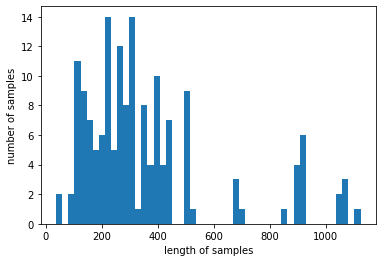

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

print('txt의 최대 길이 :',max(len(l) for l in X_train))
print('txt의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
max_len = 600
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 600 이하인 샘플의 비율: 86.875


In [47]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [49]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='softmax'))

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15)


Train on 160 samples
Epoch 1/15
 32/160 [=====>........................] - ETA: 16s

UnimplementedError:  Cast string to int64 is not supported
	 [[node loss/dense_loss/Cast (defined at C:\Users\ky_moon\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_6450]

Function call stack:
distributed_function
